# Exercises for Chapter 4: Deep Neural networks

This chapter introduces deep neural networks, which have more than one hidden layer.
With ReLU activation functions, both shallow and deep networks describe piecewise
linear mappings from input to output.
As the number of hidden units increases, shallow neural networks improve their
descriptive power. Indeed, with enough hidden units, shallow networks can describe
arbitrarily complex functions in high dimensions. However, it turns out that for some
functions, the required number of hidden units is impractically large. Deep networks can
produce many more linear regions than shallow networks for a given number of parame-
ters. Hence, from a practical standpoint, they can be used to describe a broader family
of functions.

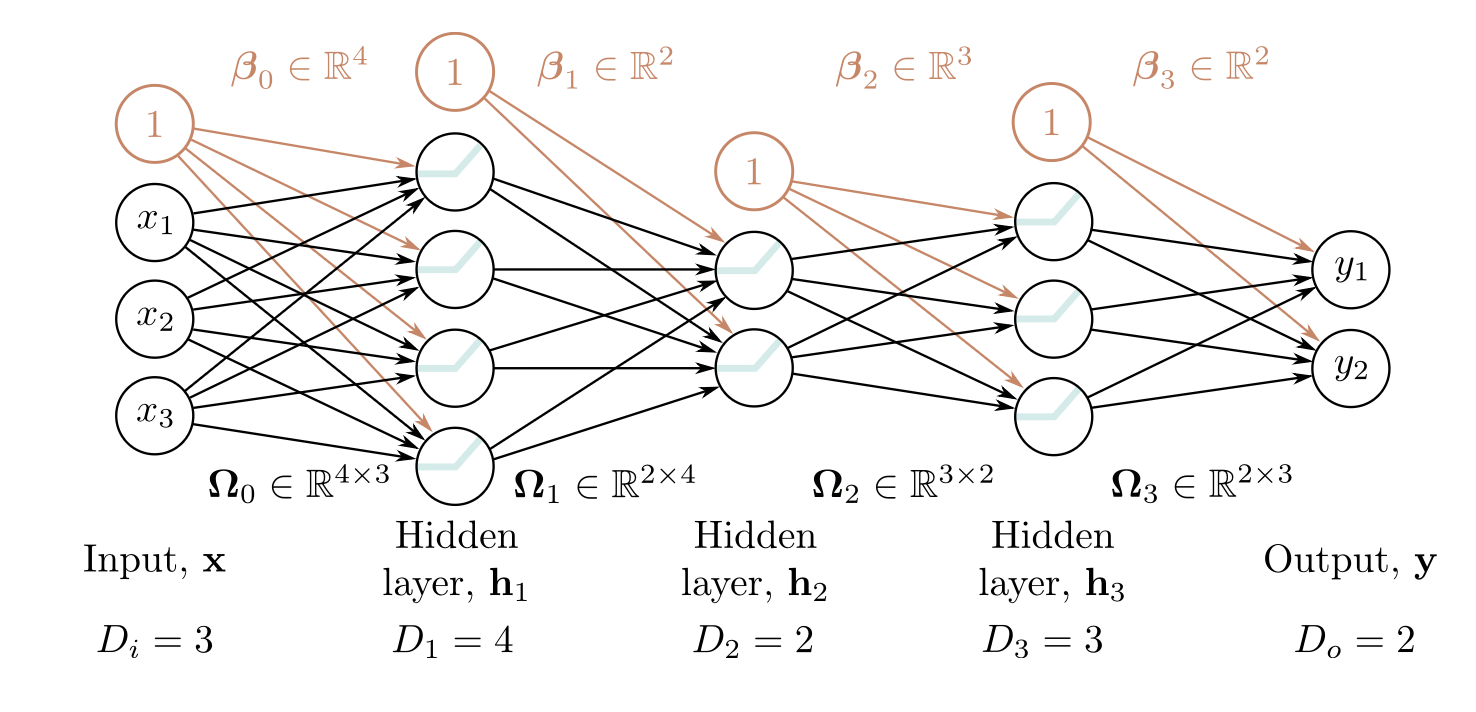

In [5]:
from IPython.display import Image, display
display(Image(filename="Figures/figure_4_6.png", embed=True))

**Figure 4.6: Matrix notation (example).** Let the input have dimension $D_i=3$, the output $D_o=2$, and there be $K=3$ hidden layers
$h_1,h_2,h_3$ with $D_1=4$, $D_2=2$, $D_3=3$.

The weights $\Omega_k$ multiply activations from the previous layer to form pre-activations of the next layer, and biases
$\beta_k$ feed into the layer they create:
$$
z_{k+1}=\Omega_k\,h_k+\beta_k, \qquad h_0:=x,\; h_{K+1}:=y.
$$

**Shapes**
| mapping | weight | shape of $\Omega_k$ | bias | length of $\beta_k$ |
|---|---|---|---|---|
| $x \to h_1$ | $\Omega_0$ | $4 \times 3$ | $\beta_0$ | $4$ |
| $h_1 \to h_2$ | $\Omega_1$ | $2 \times 4$ | $\beta_1$ | $2$ |
| $h_2 \to h_3$ | $\Omega_2$ | $3 \times 2$ | $\beta_2$ | $3$ |
| $h_3 \to y$ | $\Omega_3$ | $2 \times 3$ | $\beta_3$ | $2$ |

Example: $\Omega_1$ is $2\times 4$ (maps four units in $h_1$ to two in $h_2$); $\beta_2$ has length $3$ because it feeds into $h_3$, which has three units.

## Exercise 4.1 (Pen&Paper)

*Identify the hyperparameters in Figure 4.6 (there are four).*

<div style="color:green">

**Answer**

- Number of hidden layers, $K = 3$
- Number of hidden units in layer 1, $D_1 = 4$
- Number of hidden units in layer 2, $D_2 = 2$
- Number of hidden units in layer 3, $D_3 = 3$

</div>

## Exercise 4.2 (Pen&Paper)

 Consider a deep neural network with $D_i = 5$ inputs, $D_o = 1$ output, and $K=20$ hidden layers containing $D=30$ hidden units each. What is the depth of this network? What is the width?

<div style="color:green">

**Answer**

The depth is 20 and the width is 30.

</div>

## Exercise 4.3 (Pen&Paper)

Consider a network with $D_i = 1$ input, $D_o = 1$ output, $K = 10$ layers, with $D = 10$ hidden units in each. Would the number of weights increase more if we increased the **depth** by one or the **width** by one? Explain your answer.

<div style="color:green">

**Answer**

If we add an extra layer (increase depth), then we add $10 \times 10 = 100$ weights.  

If we add an extra hidden unit per layer (increase width), then:
- we add one extra weight from the input to the first hidden layer,  
- \(21\) extra weights between each pair of hidden layers (now 11 hidden units connect to 11 hidden units vs. $10\times 10$ before),  
- and one extra weight when we connect the last hidden layer to the output.  

This gives a total of  
$$
1 + (21 \times 9) + 1 = 191
$$
extra weights.  

So you add **more** by increasing the width.

</div>

# Coding Exercises

## 4.4 Composing Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [3]:
# Define a shallow neural network with one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # Initial lines
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x
  # Activation functions
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  # Weight activations
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3
  # Combine weighted activation and add y offset
  y = phi_0 + w_act_1 + w_act_2 + w_act_3
  # Return everything we have calculated
  return y

In [4]:
# # Plot two shallow neural networks and the composition of the two
def plot_neural_two_components(x_in, net1_out, net2_out, net12_out=None):

  # Plot the two networks separately
  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_in, net1_out,'r-')
  ax[0].set_xlabel('Net 1 input'); ax[0].set_ylabel('Net 1 output')
  ax[0].set_xlim([-1,1]);ax[0].set_ylim([-1,1])
  ax[0].set_aspect(1.0)
  ax[1].plot(x_in, net2_out,'b-')
  ax[1].set_xlabel('Net 2 input'); ax[1].set_ylabel('Net 2 output')
  ax[1].set_xlim([-1,1]);ax[1].set_ylim([-1,1])
  ax[1].set_aspect(1.0)
  plt.show()

  if net12_out is not None:
    # Plot their composition
    fig, ax = plt.subplots()
    ax.plot(x_in ,net12_out,'g-')
    ax.set_xlabel('Net 1 Input'); ax.set_ylabel('Net 2 Output')
    ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
    ax.set_aspect(1.0)
    plt.show()

Let's define two networks.  We'll put the prefixes n1_ and n2_ before all the variables to make it clear which network is which.  We'll just consider the inputs and outputs over the range [-1,1].

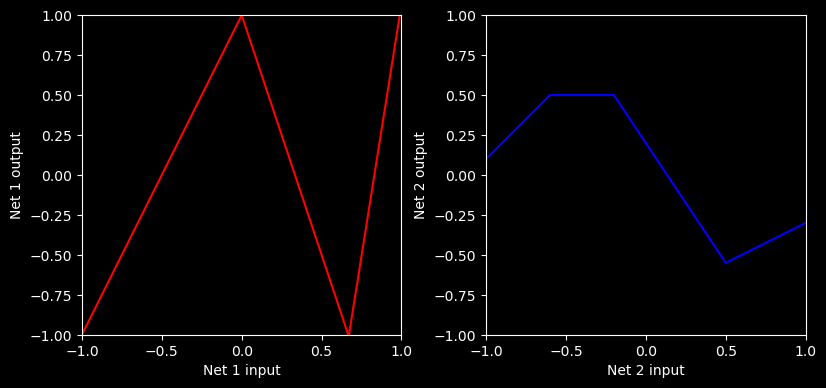

In [5]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Display the two inputs
x = np.arange(-1,1,0.001)
# We run the first  and second neural networks for each of these input values
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# Plot both graphs
plot_neural_two_components(x, net1_out, net2_out)

In [11]:
# TODO
# Take a piece of paper and draw what you think will happen when we feed the
# output of the first network into the second one.  Draw the relationship between
# the input of the first network and the output of the second one.

In [12]:
# # Now let's see if your predictions were right

# # TODO feed the output of first network into second network (replace this line)
# net12_out = np.zeros_like(x)

# # Plot all three graphs
# plot_neural_two_components(x, net1_out, net2_out, net12_out)

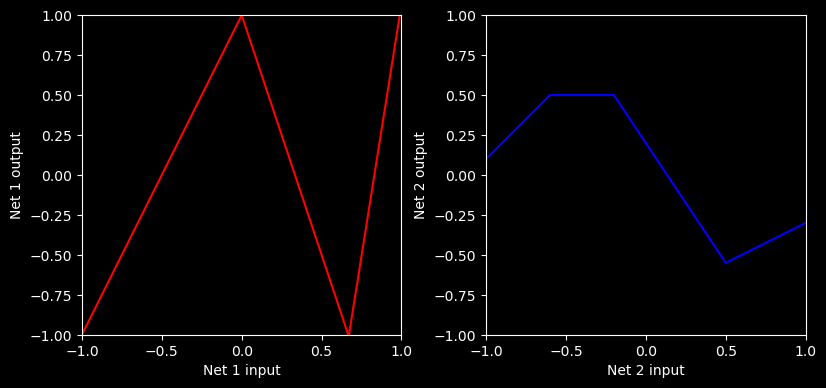

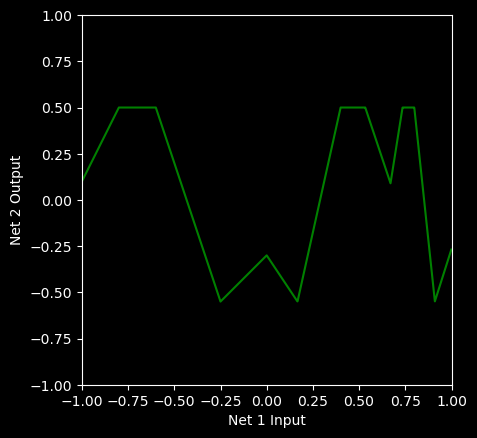

In [6]:
# Now let's see if your predictions were right

# TODO feed the output of first network into second network (replace this line)
net12_out = shallow_1_1_3(
    net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31
)

# Plot all three graphs
plot_neural_two_components(x, net1_out, net2_out, net12_out)

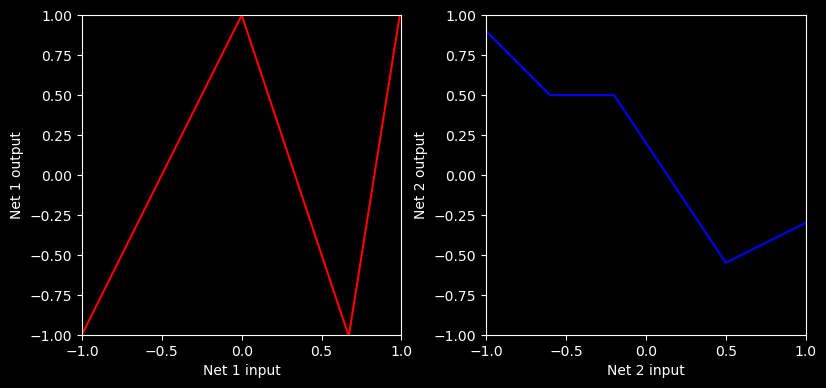

In [7]:
# Now we'll change things a up a bit.  What happens if we change the second network? (note the *-1 change)
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out)

In [15]:
# TODO
# Take a piece of paper and draw what you think will happen when we feed the
# output of the first network into the modified second network.  Draw the relationship between
# the input of the first network and the output of the second one.

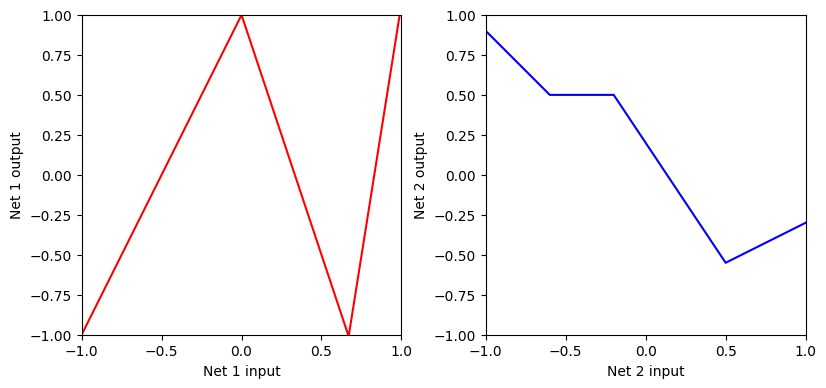

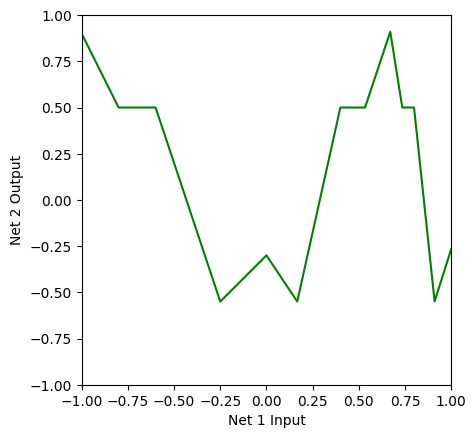

In [16]:
# When you have a prediction, run this code to see if you were right
net12_out = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out, net12_out)

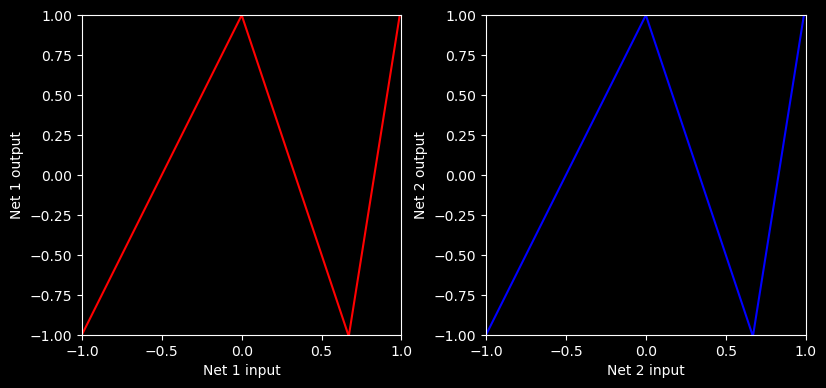

In [9]:
# Let's change things again.  What happens if the first network and second networks are the same?
net1_out = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out_new = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new)

In [18]:
# TODO
# Take a piece of paper and draw what you think will happen when we feed the
# output of the first network into the a copy of itself.  Draw the relationship between
# the input of the first network and the output of the second one.

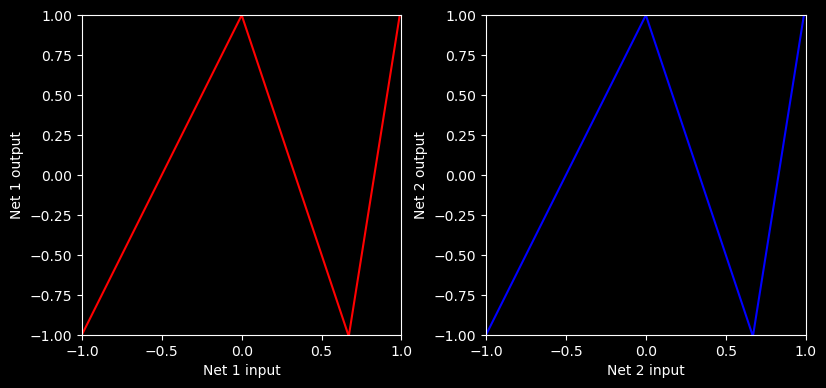

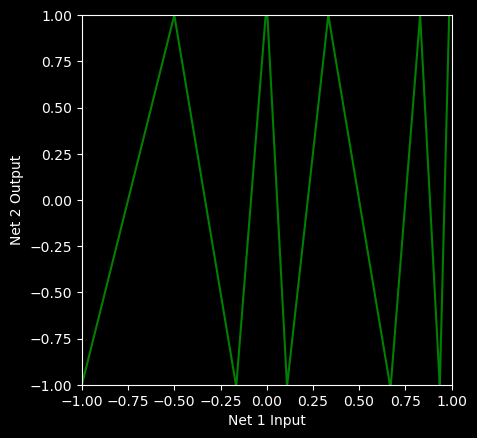

In [10]:
# When you have a prediction, run this code to see if you were right
net12_out = shallow_1_1_3(net1_out, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new, net12_out)

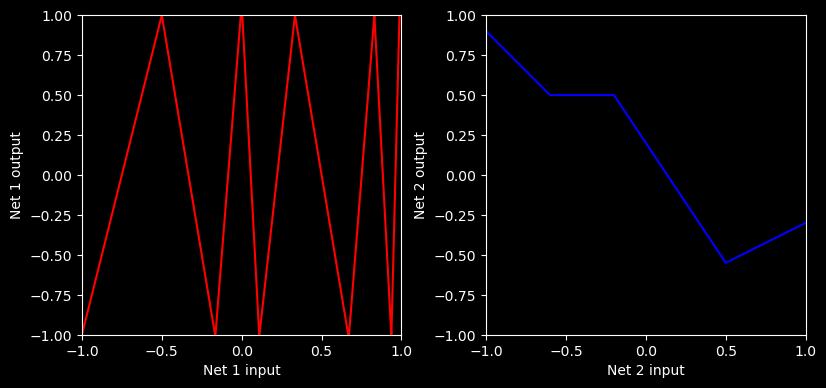

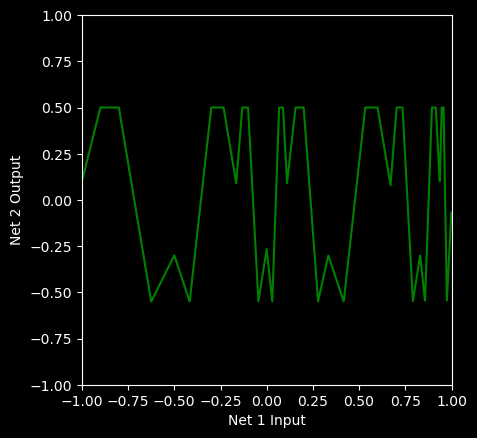

In [11]:
# TODO
# Contemplate what you think will happen when we feed the
# output of the original first network into a second copy of the original first network, and then
# the output of that into the original second network (so now we have a three layer network)
# How many total linear regions will we have in the output?
net123_out = shallow_1_1_3(net12_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net12_out, net2_out, net123_out)

## 4.5 Deep Neural Networks

In [14]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [15]:
display(Image(filename="Figures/figure_4_4.png", embed=True))

NameError: name 'Image' is not defined

In the previous section, we showed that composing two shallow networks yields a special case of a deep network with two hidden layers. Now we consider the general case of a deep network with two hidden layers, each containing three hidden units (figure 4.4).  
The first layer is defined by:

$$
\begin{aligned}
h_1 &= a[\theta_{10} + \theta_{11}x] \\
h_2 &= a[\theta_{20} + \theta_{21}x] \\
h_3 &= a[\theta_{30} + \theta_{31}x],
\end{aligned}
\tag{4.7}
$$

the second layer by:

$$
\begin{aligned}
h'_1 &= a[\psi_{10} + \psi_{11}h_1 + \psi_{12}h_2 + \psi_{13}h_3] \\
h'_2 &= a[\psi_{20} + \psi_{21}h_1 + \psi_{22}h_2 + \psi_{23}h_3] \\
h'_3 &= a[\psi_{30} + \psi_{31}h_1 + \psi_{32}h_2 + \psi_{33}h_3],
\end{aligned}
\tag{4.8}
$$

and the output by:

$$
y' = \phi'_0 + \phi'_1 h'_1 + \phi'_2 h'_2 + \phi'_3 h'_3 .
\tag{4.9}
$$

In [23]:
# # Define a deep neural network with, one input, one output, two hidden layers and three hidden units (eqns 4.7-4.9)
# # To make this easier, we store the parameters in ndarrays, so phi_0 = phi[0] and psi_3,3 = psi[3,3] etc.
# def shallow_1_1_3_3(x, activation_fn, phi, psi, theta):

#   # TODO -- You write this function
#   # Replace the skeleton code below.

#   # ANSWER
#   # Preactivations at layer 1 (terms in brackets in equation 4.7)
#   layer1_pre_1 = np.zeros_like(x) ;
#   layer1_pre_2 = np.zeros_like(x) ;
#   layer1_pre_3 = np.zeros_like(x) ;

#   # Activation functions (rest of equation 4.7)
#   h1 = activation_fn(layer1_pre_1)
#   h2 = activation_fn(layer1_pre_2)
#   h3 = activation_fn(layer1_pre_3)

#   # Preactivations at layer 2 (terms in brackets in equation 4.8)
#   layer2_pre_1 = np.zeros_like(x) ;
#   layer2_pre_2 = np.zeros_like(x) ;
#   layer2_pre_3 = np.zeros_like(x) ;

#   # Activation functions (rest of equation 4.8)
#   h1_prime = activation_fn(layer2_pre_1)
#   h2_prime = activation_fn(layer2_pre_2)
#   h3_prime = activation_fn(layer2_pre_3)

#   # Weighted outputs by phi (three last terms of equation 4.9)
#   phi1_h1_prime = np.zeros_like(x) ;
#   phi2_h2_prime = np.zeros_like(x) ;
#   phi3_h3_prime = np.zeros_like(x) ;

#   # Combine weighted activation and add y offset (summing terms of equation 4.9)
#   y = np.zeros_like(x) ;


#   # Return everything we have calculated
#   return y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime

In [24]:
# Define a deep neural network with, one input, one output, two hidden layers and three hidden units (eqns 4.7-4.9)
# To make this easier, we store the parameters in ndarrays, so phi_0 = phi[0] and psi_3,3 = psi[3,3] etc.
def shallow_1_1_3_3(x, activation_fn, phi, psi, theta):

  # TODO -- You write this function
  # Replace the skeleton code below.

  # ANSWER
  # Preactivations at layer 1 (terms in brackets in equation 4.7)
  layer1_pre_1 = theta[1, 0] + theta[1, 1] * x
  layer1_pre_2 = theta[2, 0] + theta[2, 1] * x
  layer1_pre_3 = theta[3, 0] + theta[3, 1] * x

  # Activation functions (rest of equation 4.7)
  h1 = activation_fn(layer1_pre_1)
  h2 = activation_fn(layer1_pre_2)
  h3 = activation_fn(layer1_pre_3)

  # Preactivations at layer 2 (terms in brackets in equation 4.8)
  layer2_pre_1 = psi[1, 0] + psi[1, 1] * h1 + psi[1, 2] * h2 + psi[1, 3] * h3
  layer2_pre_2 = psi[2, 0] + psi[2, 1] * h1 + psi[2, 2] * h2 + psi[2, 3] * h3
  layer2_pre_3 = psi[3, 0] + psi[3, 1] * h1 + psi[3, 2] * h2 + psi[3, 3] * h3

  # Activation functions (rest of equation 4.8)
  h1_prime = activation_fn(layer2_pre_1)
  h2_prime = activation_fn(layer2_pre_2)
  h3_prime = activation_fn(layer2_pre_3)

  # Weighted outputs by phi (three last terms of equation 4.9)
  phi1_h1_prime = phi[1] * h1_prime
  phi2_h2_prime = phi[2] * h2_prime
  phi3_h3_prime = phi[3] * h3_prime

  # Combine weighted activation and add y offset (summing terms of equation 4.9)
  y = phi[0] + phi1_h1_prime + phi2_h2_prime + phi3_h3_prime


  # Return everything we have calculated
  return y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime

In [25]:
# # Plot two layer neural network as in figure 4.5
def plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime):

    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,layer2_pre_1,'r-'); ax[0,0].set_ylabel(r'$\psi_{10}+\psi_{11}h_{1}+\psi_{12}h_{2}+\psi_{13}h_3$')
    ax[0,1].plot(x,layer2_pre_2,'b-'); ax[0,1].set_ylabel(r'$\psi_{20}+\psi_{21}h_{1}+\psi_{22}h_{2}+\psi_{23}h_3$')
    ax[0,2].plot(x,layer2_pre_3,'g-'); ax[0,2].set_ylabel(r'$\psi_{30}+\psi_{31}h_{1}+\psi_{32}h_{2}+\psi_{33}h_3$')
    ax[1,0].plot(x,h1_prime,'r-'); ax[1,0].set_ylabel(r"$h_{1}^{'}$")
    ax[1,1].plot(x,h2_prime,'b-'); ax[1,1].set_ylabel(r"$h_{2}^{'}$")
    ax[1,2].plot(x,h3_prime,'g-'); ax[1,2].set_ylabel(r"$h_{3}^{'}$")
    ax[2,0].plot(x,phi1_h1_prime,'r-'); ax[2,0].set_ylabel(r"$\phi_1 h_{1}^{'}$")
    ax[2,1].plot(x,phi2_h2_prime,'b-'); ax[2,1].set_ylabel(r"$\phi_2 h_{2}^{'}$")
    ax[2,2].plot(x,phi3_h3_prime,'g-'); ax[2,2].set_ylabel(r"$\phi_3 h_{3}^{'}$")

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel(r'Input, $x$');
    plt.show()

    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.set_xlabel(r'Input, $x$'); ax.set_ylabel(r'Output, $y$')
    ax.set_xlim([0,1]);ax.set_ylim([-1,1])
    ax.set_aspect(0.5)
    plt.show()

Now let's define the parameters and visualize the network

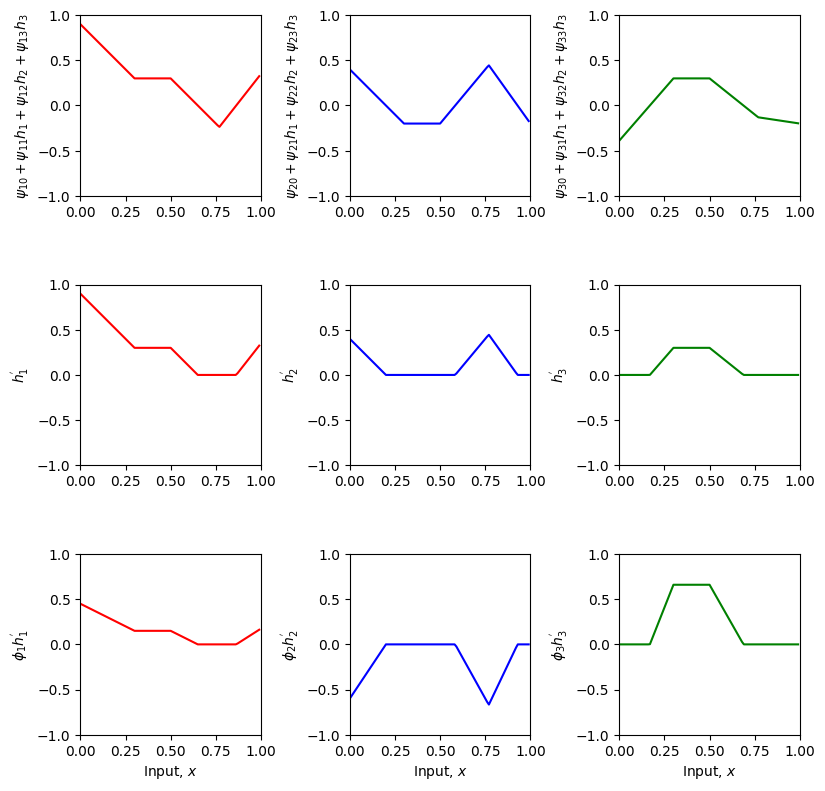

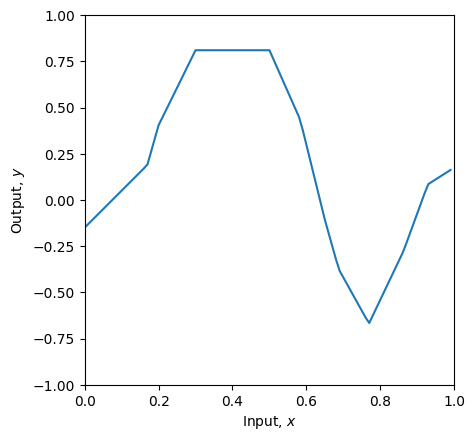

In [26]:
# Define parameters (note first dimension of theta and psi is padded to make indices match
# notation in book)
theta = np.zeros([4,2])
psi = np.zeros([4,4])
phi = np.zeros([4,1])

theta[1,0] =  0.3 ; theta[1,1] = -1.0
theta[2,0]= -1.0  ; theta[2,1] = 2.0
theta[3,0] = -0.5  ; theta[3,1] = 0.65
psi[1,0] = 0.3;  psi[1,1] = 2.0; psi[1,2] = -1.0; psi[1,3]=7.0
psi[2,0] = -0.2;  psi[2,1] = 2.0; psi[2,2] = 1.2; psi[2,3]=-8.0
psi[3,0] = 0.3;  psi[3,1] = -2.3; psi[3,2] = -0.8; psi[3,3]=2.0
phi[0] = 0.0; phi[1] = 0.5; phi[2] = -1.5; phi [3] = 2.2

# Define a range of input values
x = np.arange(0,1,0.01)

# Run the neural network
y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime \
    = shallow_1_1_3_3(x, ReLU, phi, psi, theta)

# And then plot it
plot_neural_two_layers(x, y, layer2_pre_1, layer2_pre_2, layer2_pre_3, h1_prime, h2_prime, h3_prime, phi1_h1_prime, phi2_h2_prime, phi3_h3_prime)

## 4.6 Matrix Notation


In [27]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [28]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # Initial lines
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x
  # Activation functions
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  # Weight activations
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3
  # Combine weighted activation and add y offset
  y = phi_0 + w_act_1 + w_act_2 + w_act_3
  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [29]:
# # Plot the shallow neural network.  We'll assume input in is range [-1,1] and output [-1,1]
def plot_neural(x, y):
  fig, ax = plt.subplots()
  ax.plot(x.T,y.T)
  ax.set_xlabel('Input'); ax.set_ylabel('Output')
  ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
  ax.set_aspect(1.0)
  plt.show()

Let's define a network.  We'll just consider the inputs and outputs over the range [-1,1].

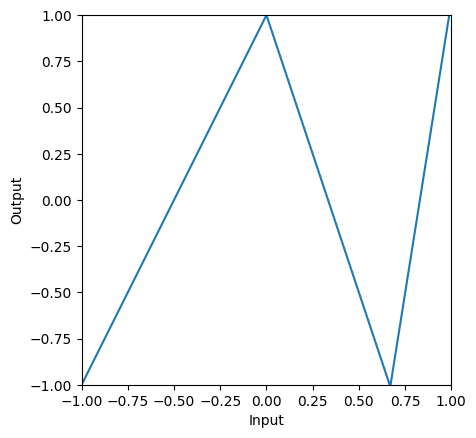

In [30]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Define a range of input values
n1_in = np.arange(-1,1,0.01).reshape([1,-1])

# We run the neural network for each of these input values
n1_out, *_ = shallow_1_1_3(n1_in, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
# And then plot it
plot_neural(n1_in, n1_out)

$$
\begin{aligned}
\mathbf{h}_1 &= a[\boldsymbol{\beta}_0 + \boldsymbol{\Omega}_0 \mathbf{x}] \\
\mathbf{h}_2 &= a[\boldsymbol{\beta}_1 + \boldsymbol{\Omega}_1 \mathbf{h}_1] \\
\mathbf{h}_3 &= a[\boldsymbol{\beta}_2 + \boldsymbol{\Omega}_2 \mathbf{h}_2] \\
&\;\;\vdots \\
\mathbf{h}_K &= a[\boldsymbol{\beta}_{K-1} + \boldsymbol{\Omega}_{K-1}\mathbf{h}_{K-1}] \\
\mathbf{y}   &= \boldsymbol{\beta}_K + \boldsymbol{\Omega}_K \mathbf{h}_K .
\end{aligned}
\tag{4.15}
$$

Now we'll define the same neural network, but this time, we will  use matrix form as in equation 4.15.  When you get this right, it will draw the same plot as above.

In [31]:
# beta_0 = np.zeros((3,1))
# Omega_0 = np.zeros((3,1))
# beta_1 = np.zeros((1,1))
# Omega_1 = np.zeros((1,3))

# # TODO Fill in the values of the beta and Omega matrices with the n1_theta and n1_phi parameters that define the network above
# # !!! NOTE THAT MATRICES ARE CONVENTIONALLY INDEXED WITH a_11 IN THE TOP LEFT CORNER, BUT NDARRAYS START AT [0,0]
# # To get you started I've filled in a couple:
# beta_0[0,0] = n1_theta_10
# Omega_0[0,0] = n1_theta_11

# # Make sure that input data matrix has different inputs in its columns
# n_data = n1_in.size
# n_dim_in = 1
# n1_in_mat = np.reshape(n1_in,(n_dim_in,n_data))

# # This runs the network for ALL of the inputs, x at once so we can draw graph
# h1 = ReLU(beta_0 + np.matmul(Omega_0,n1_in_mat))
# n1_out = beta_1 + np.matmul(Omega_1,h1)

# # Draw the network and check that it looks the same as the non-matrix case
# plot_neural(n1_in, n1_out)

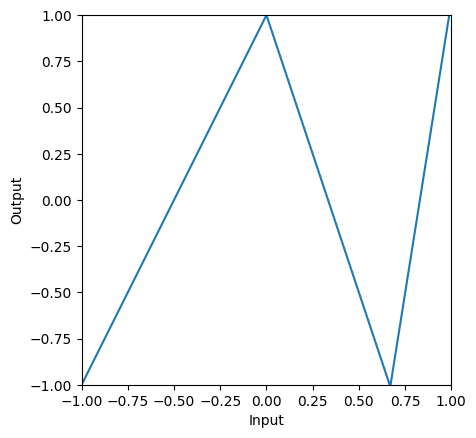

In [32]:
beta_0 = np.zeros((3,1))
Omega_0 = np.zeros((3,1))
beta_1 = np.zeros((1,1))
Omega_1 = np.zeros((1,3))

# TODO Fill in the values of the beta and Omega matrices with the n1_theta and n1_phi parameters that define the network above
# !!! NOTE THAT MATRICES ARE CONVENTIONALLY INDEXED WITH a_11 IN THE TOP LEFT CORNER, BUT NDARRAYS START AT [0,0]
# To get you started I've filled in a couple:
beta_0[0,0] = n1_theta_10   # unit 1 bias
beta_0[1,0] = n1_theta_20   # unit 2 bias
beta_0[2,0] = n1_theta_30   # unit 3 bias

Omega_0[0,0] = n1_theta_11  # unit 1 weight on x
Omega_0[1,0] = n1_theta_21  # unit 2 weight on x
Omega_0[2,0] = n1_theta_31  # unit 3 weight on x

# Output layer bias (beta_1) and weights (Omega_1)
beta_1[0,0]  = n1_phi_0     # output bias

Omega_1[0,0] = n1_phi_1     # weight on h1
Omega_1[0,1] = n1_phi_2     # weight on h2
Omega_1[0,2] = n1_phi_3     # weight on h3

# Make sure that input data matrix has different inputs in its columns
n_data = n1_in.size
n_dim_in = 1
n1_in_mat = np.reshape(n1_in,(n_dim_in,n_data))

# This runs the network for ALL of the inputs, x at once so we can draw graph
h1 = ReLU(beta_0 + np.matmul(Omega_0,n1_in_mat))
n1_out = beta_1 + np.matmul(Omega_1,h1)

# Draw the network and check that it looks the same as the non-matrix case
plot_neural(n1_in, n1_out)

Now we'll feed the output of the first network into the second one.

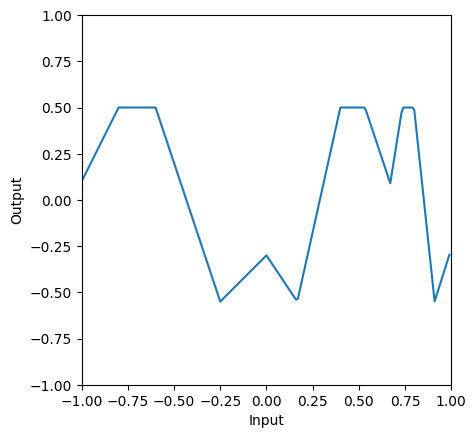

In [33]:
# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Define a range of input values
n2_in = np.arange(-1,1,0.01)

# We run the second neural network on the output of the first network
n2_out, *_ = \
    shallow_1_1_3(n1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# And then plot it
plot_neural(n1_in, n2_out)

Now we'll define the same neural network, but this time, we will  use matrix form as in equation 4.15.  When you get this right, it will draw the same plot as above.

In [34]:
# beta_0 = np.zeros((3,1))
# Omega_0 = np.zeros((3,1))
# beta_1 = np.zeros((3,1))
# Omega_1 = np.zeros((3,3))
# beta_2 = np.zeros((1,1))
# Omega_2 = np.zeros((1,3))

# # TODO Fill in the values of the beta and Omega matrices for the n1_theta, n1_phi, n2_theta, and n2_phi parameters
# # that define the composition of the two networks above
# # !!! NOTE THAT MATRICES ARE CONVENTIONALLY INDEXED WITH a_11 IN THE TOP LEFT CORNER, BUT NDARRAYS START AT [0,0] SO EVERYTHING IS OFFSET
# # To get you started I've filled in a few:
# beta_0[0,0] = n1_theta_10
# Omega_0[0,0] = n1_theta_11
# beta_1[0,0] = n2_theta_10 + n2_theta_11 * n1_phi_0
# Omega_1[0,0] = n2_theta_11 * n1_phi_1


# # Make sure that input data matrix has different inputs in its columns
# n_data = n1_in.size
# n_dim_in = 1
# n1_in_mat = np.reshape(n1_in,(n_dim_in,n_data))

# # This runs the network for ALL of the inputs, x at once so we can draw graph (hence extra np.ones term)
# h1 = ReLU(beta_0 + np.matmul(Omega_0,n1_in_mat))
# h2 = ReLU(beta_1 + np.matmul(Omega_1,h1))
# n1_out = beta_2 + np.matmul(Omega_2,h2)

# # Draw the network and check that it looks the same as the non-matrix version
# plot_neural(n1_in, n1_out)

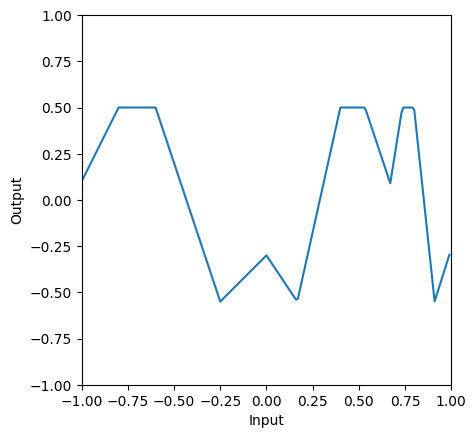

In [35]:
beta_0 = np.zeros((3,1))
Omega_0 = np.zeros((3,1))
beta_1 = np.zeros((3,1))
Omega_1 = np.zeros((3,3))
beta_2 = np.zeros((1,1))
Omega_2 = np.zeros((1,3))

# TODO Fill in the values of the beta and Omega matrices for the n1_theta, n1_phi, n2_theta, and n2_phi parameters
# that define the composition of the two networks above
# !!! NOTE THAT MATRICES ARE CONVENTIONALLY INDEXED WITH a_11 IN THE TOP LEFT CORNER, BUT NDARRAYS START AT [0,0] SO EVERYTHING IS OFFSET
# To get you started I've filled in a few:
# Layer 1: net1 hidden layer h1 = ReLU(beta_0 + Omega_0 x)
beta_0[0,0] = n1_theta_10
beta_0[1,0] = n1_theta_20
beta_0[2,0] = n1_theta_30

Omega_0[0,0] = n1_theta_11
Omega_0[1,0] = n1_theta_21
Omega_0[2,0] = n1_theta_31

# Layer 2: net2 preactivations with input x2 = y1 = phi0 + sum_j phi_j h1_j
# For k in {1,2,3}: z_k = (n2_theta_k0 + n2_theta_k1 * n1_phi_0) + sum_j (n2_theta_k1 * n1_phi_j) h1_j
beta_1[0,0] = n2_theta_10 + n2_theta_11 * n1_phi_0
beta_1[1,0] = n2_theta_20 + n2_theta_21 * n1_phi_0
beta_1[2,0] = n2_theta_30 + n2_theta_31 * n1_phi_0

Omega_1[0,0] = n2_theta_11 * n1_phi_1
Omega_1[0,1] = n2_theta_11 * n1_phi_2
Omega_1[0,2] = n2_theta_11 * n1_phi_3

Omega_1[1,0] = n2_theta_21 * n1_phi_1
Omega_1[1,1] = n2_theta_21 * n1_phi_2
Omega_1[1,2] = n2_theta_21 * n1_phi_3

Omega_1[2,0] = n2_theta_31 * n1_phi_1
Omega_1[2,1] = n2_theta_31 * n1_phi_2
Omega_1[2,2] = n2_theta_31 * n1_phi_3

# Output layer of net2: y = n2_phi_0 + sum_j n2_phi_j h2_j
beta_2[0,0] = n2_phi_0

Omega_2[0,0] = n2_phi_1
Omega_2[0,1] = n2_phi_2
Omega_2[0,2] = n2_phi_3

# Make sure that input data matrix has different inputs in its columns
n_data = n1_in.size
n_dim_in = 1
n1_in_mat = np.reshape(n1_in,(n_dim_in,n_data))

# This runs the network for ALL of the inputs, x at once so we can draw graph (hence extra np.ones term)
h1 = ReLU(beta_0 + np.matmul(Omega_0,n1_in_mat))
h2 = ReLU(beta_1 + np.matmul(Omega_1,h1))
n1_out = beta_2 + np.matmul(Omega_2,h2)

# Draw the network and check that it looks the same as the non-matrix version
plot_neural(n1_in, n1_out)